In [59]:
import pandas as pd
from io import StringIO
import numpy as np

df = pd.read_excel ('Region2.xlsx')
col = ['desc', 'storeys']
df = df[col]

#df['storeys_id'] = df['storeys'].factorize()[0]

#dropping rows with empty storeys cells
df[df['storeys']==' '] = np.nan
df = df.dropna()
df.head()

,desc,storeys
0,Absolute Gem in the heart of Doon! This Gorgeo...,2
1,Bright And Open Concept Home In Desirable Doon...,2
2,Stunning family home facing Doon Creek Natural...,2
3,"Beautiful 4 bedroom, 3 bathroom, executive hom...",2
4,Location ! And Great Opportunity To Own Gorgeo...,2


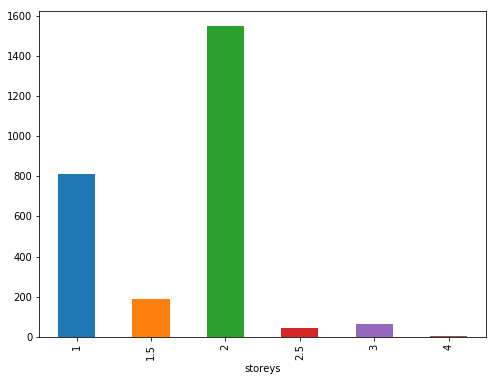

In [60]:
#visualizing the data
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('storeys').desc.count().plot.bar(ylim=0)
plt.show()

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.desc).toarray()
labels = df.storeys
features.shape

(2664, 7932)

In [62]:
df['category_id'] = df['storeys'].factorize()[0]
category_id_df = df[['storeys', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'storeys']].values)

In [63]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for storeys, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(storeys))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '1':
  . Most correlated unigrams:
. exception
. zoo
  . Most correlated bigrams:
. excellent school
. excellent location
# '1.5':
  . Most correlated unigrams:
. exception
. zoo
  . Most correlated bigrams:
. excellent school
. excellent location
# '2':
  . Most correlated unigrams:
. exception
. zoo
  . Most correlated bigrams:
. excellent school
. excellent location
# '2.5':
  . Most correlated unigrams:
. exception
. zoo
  . Most correlated bigrams:
. excellent school
. excellent location
# '3':
  . Most correlated unigrams:
. exception
. zoo
  . Most correlated bigrams:
. excellent school
. excellent location
# '4':
  . Most correlated unigrams:
. exception
. zoo
  . Most correlated bigrams:
. excellent school
. excellent location
